# Term Project

In [154]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

Name: 
Type: DiGraph
Number of nodes: 5
Number of edges: 7
Average in degree:   1.4000
Average out degree:   1.4000


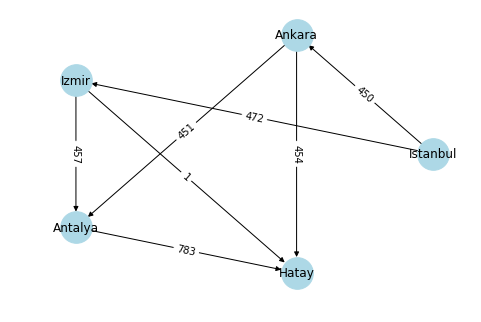

In [155]:
G = nx.DiGraph()
G.add_edge("Istanbul", "Ankara", weight = "450")
G.add_edge("Istanbul", "Izmir", weight = "472")
G.add_edge("Izmir", "Antalya", weight = "457")
G.add_edge("Ankara", "Antalya", weight = "451")
G.add_edge("Ankara", "Hatay", weight = "454")
G.add_edge("Antalya", "Hatay", weight = "783")

G.add_edge("Izmir", "Hatay", weight = "1")

pos_fr = nx.circular_layout(G)
nx.draw(G, pos=pos_fr, node_size=1000, node_color='lightblue', with_labels=True)
nx.draw_networkx_edge_labels(G,pos=pos_fr, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.tight_layout()

print(nx.info(G))

# Find Shortest Paths

[Dijkstra Algorithm](https://algs4.cs.princeton.edu/lectures/44DemoDijkstra.pdf)

In [156]:
import numpy as np
from heapq import *

def my_dijkstra(G, s, t):  
    """Write Lazy Dijkstra Algorithm"""
    pq, edgeTo, distTo = [], dict(), {n:float("inf") for n in G.nodes()}
    # initially distance to every vertex is +inf, except source vertex s
    distTo[s] = 0
    heappush(pq, (distTo[s], s)) # Add vertex v to priority queue with priority distTo[v]
    while pq: # while queue is not empty
        cost, v1 = heappop(pq) # pop a vertex
        if v1 == t: return (cost, edgeTo) # if target is reached stop
        for v2 in list(G.neighbors(v1)) : # if not, relax every edge to all neighbors
            c = int(G[v1][v2]['weight'])
            if cost+c < distTo[v2]:
                distTo[v2] = cost+c # Edge relaxation
                heappush(pq, (distTo[v2], v2))
                edgeTo[v2] = v1 # store from where you come to v3

    return (float("inf"), edgeTo)

def getPathFromEdgeTo(s, t, edgeTo):
    path = []
    while t != s:
        path.append(t)
        t = edgeTo[t]
    path.append(t)
    return list(reversed(path))


def findAllShortestPaths(G, display = False):
    sp = dict()
    for s in G.nodes():
        for t in G.nodes():
            if s != t:
                cost, edgeTo = my_dijkstra(G, s, t)
                if cost != float("inf"):
                    path = getPathFromEdgeTo(s, t, edgeTo)
                    sp[(s,t)] = (path, cost)
                else:
                    if display: print("INF (No Way Out): ", s, t)
    return sp


def getEdgesFromPath(path):
    return list(zip(path[:-1], path[1:]))


def numberOfShortestPaths_PassingThroughEdges(G):
    sp = findAllShortestPaths(G)
    onsp =dict()
    for path, cost in sp.values():
        for edges in getEdgesFromPath(path):
            if edges in onsp: 
                onsp[edges] += 1
            else:
                onsp[edges] = 1
    return onsp


def getEdgeWithMaxSP(G):
    onsp = numberOfShortestPaths_PassingThroughEdges(G)
    return max(onsp, key=lambda i: onsp[i])


def draw(G):
    plt.figure(figsize=(15,15))
    B = list(nx.betweenness_centrality(G).values())
    nx.draw(G, node_size=B,
            alpha = 0.7,
            node_color = B,
            cmap = plt.cm.Blues,
            with_labels=True)

In [157]:
s, t = 'Istanbul', 'Hatay'
cost, edgeTo = my_dijkstra(G, s,t)
path = getPathFromEdgeTo(s, t, edgeTo)

print('\nPath from ', s, ' to ', t, ' has cost ', cost,'\n\tPath >>> ', path)
edgeTo


Path from  Istanbul  to  Hatay  has cost  473 
	Path >>>  ['Istanbul', 'Izmir', 'Hatay']


{'Ankara': 'Istanbul',
 'Antalya': 'Ankara',
 'Hatay': 'Izmir',
 'Izmir': 'Istanbul'}

In [125]:
nx.shortest_path(G, s,t, weight=True)

['Istanbul', 'Ankara', 'Hatay']

In [126]:
findAllShortestPaths(G)

INF (No Way Out):  Ankara Istanbul
INF (No Way Out):  Ankara Izmir
INF (No Way Out):  Izmir Istanbul
INF (No Way Out):  Izmir Ankara
INF (No Way Out):  Antalya Istanbul
INF (No Way Out):  Antalya Ankara
INF (No Way Out):  Antalya Izmir
INF (No Way Out):  Hatay Istanbul
INF (No Way Out):  Hatay Ankara
INF (No Way Out):  Hatay Izmir
INF (No Way Out):  Hatay Antalya


{('Ankara', 'Antalya'): (['Ankara', 'Antalya'], 451),
 ('Ankara', 'Hatay'): (['Ankara', 'Hatay'], 454),
 ('Antalya', 'Hatay'): (['Antalya', 'Hatay'], 783),
 ('Istanbul', 'Ankara'): (['Istanbul', 'Ankara'], 450),
 ('Istanbul', 'Antalya'): (['Istanbul', 'Ankara', 'Antalya'], 901),
 ('Istanbul', 'Hatay'): (['Istanbul', 'Izmir', 'Hatay'], 473),
 ('Istanbul', 'Izmir'): (['Istanbul', 'Izmir'], 472),
 ('Izmir', 'Antalya'): (['Izmir', 'Antalya'], 457),
 ('Izmir', 'Hatay'): (['Izmir', 'Hatay'], 1)}

## Film Babel
![Babel Film](https://img03.imgsinemalar.com/images/afis_buyuk/b/Babil-1294695025.jpg)

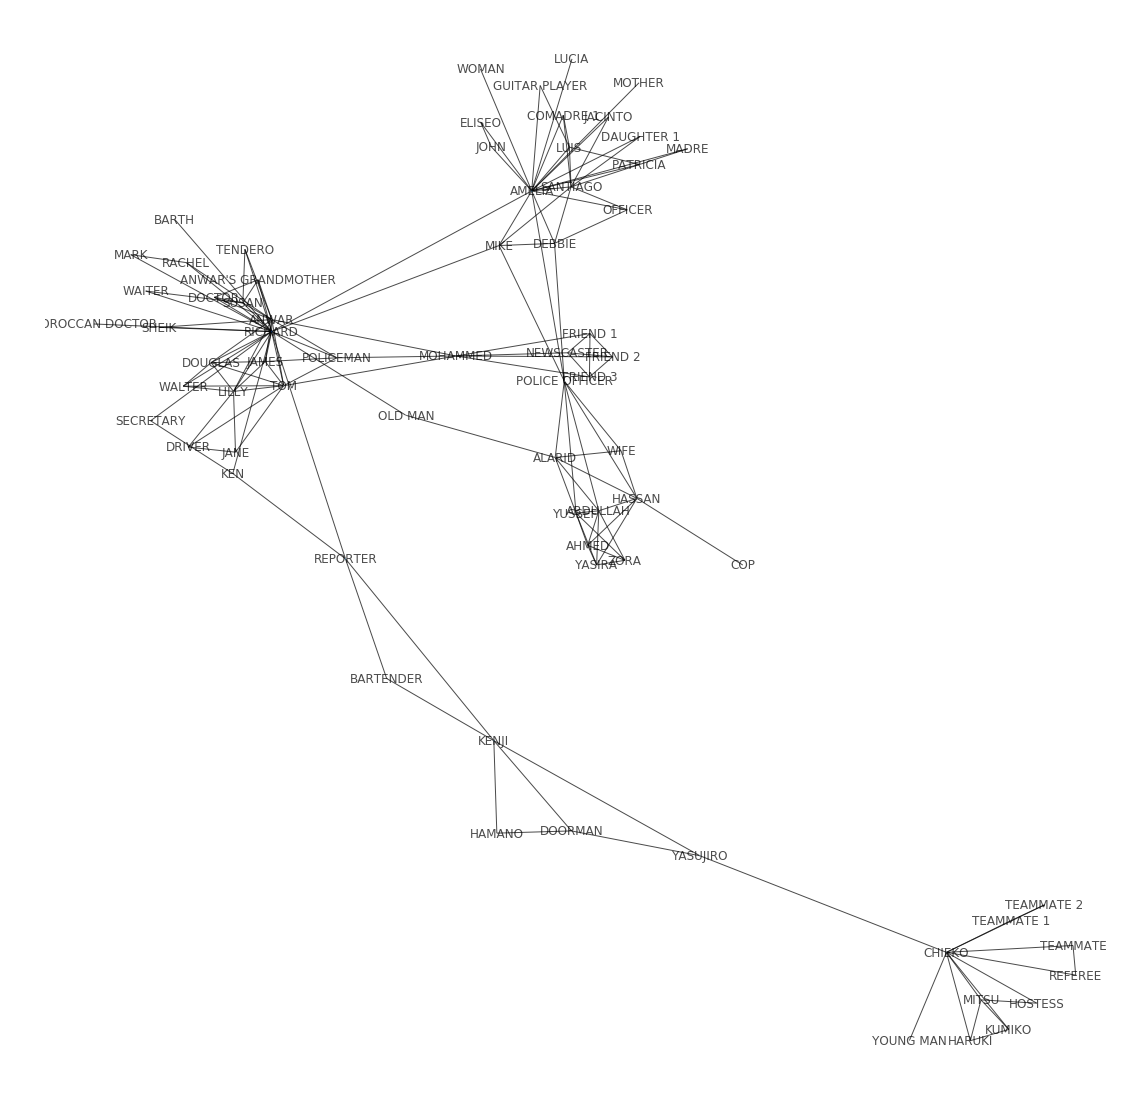

In [145]:
G =nx.read_gexf("babel.gexf", relabel= True)
draw(G)

## Find all Shortest Paths for Babel Movie

In [128]:
sp = findAllShortestPaths(G)

In [129]:
path, cost = sp[('REPORTER', 'HARUKI')]
path, cost

(['REPORTER', 'KENJI', 'YASUJIRO', 'CHIEKO', 'HARUKI'], 4)

In [130]:
getEdgesFromPath(path)

[('REPORTER', 'KENJI'),
 ('KENJI', 'YASUJIRO'),
 ('YASUJIRO', 'CHIEKO'),
 ('CHIEKO', 'HARUKI')]

In [140]:
onsp = numberOfShortestPaths_PassingThroughEdges(G)
onsp

{('ABDULLAH', 'AHMED'): 1,
 ('ABDULLAH', 'ALARID'): 4,
 ('ABDULLAH', 'HASSAN'): 2,
 ('ABDULLAH', 'POLICE OFFICER'): 124,
 ('ABDULLAH', 'YASIRA'): 1,
 ('ABDULLAH', 'ZORA'): 64,
 ('AHMED', 'ABDULLAH'): 1,
 ('AHMED', 'HASSAN'): 66,
 ('AHMED', 'YASIRA'): 2,
 ('AHMED', 'ZORA'): 1,
 ('ALARID', 'ABDULLAH'): 90,
 ('ALARID', 'HASSAN'): 180,
 ('ALARID', 'OLD MAN'): 54,
 ('ALARID', 'POLICE OFFICER'): 19,
 ('ALARID', 'WIFE'): 2,
 ('ALARID', 'YUSSEF'): 2,
 ('AMELIA', 'COMADRE 1'): 134,
 ('AMELIA', 'DAUGHTER 1'): 69,
 ('AMELIA', 'ELISEO'): 69,
 ('AMELIA', 'GUITAR PLAYER'): 69,
 ('AMELIA', 'JACINTO'): 69,
 ('AMELIA', 'JOHN'): 69,
 ('AMELIA', 'LUCIA'): 70,
 ('AMELIA', 'MADRE'): 67,
 ('AMELIA', 'MOTHER'): 70,
 ('AMELIA', 'OFFICER'): 120,
 ('AMELIA', 'PATRICIA'): 67,
 ('AMELIA', 'POLICE OFFICER'): 287,
 ('AMELIA', 'RICHARD'): 1090,
 ('AMELIA', 'WOMAN'): 70,
 ('ANWAR', "ANWAR'S GRANDMOTHER"): 16,
 ('ANWAR', 'DOCTOR'): 15,
 ('ANWAR', 'DOUGLAS'): 64,
 ('ANWAR', 'JAMES'): 7,
 ('ANWAR', 'LILLY'): 29,
 ('ANWA

In [138]:
max(onsp, key=lambda i: onsp[i])

('AMELIA', 'RICHARD')

In [147]:
e = getEdgeWithMaxSP(G)
e

('AMELIA', 'RICHARD')

In [148]:
G.remove_edge(*e)

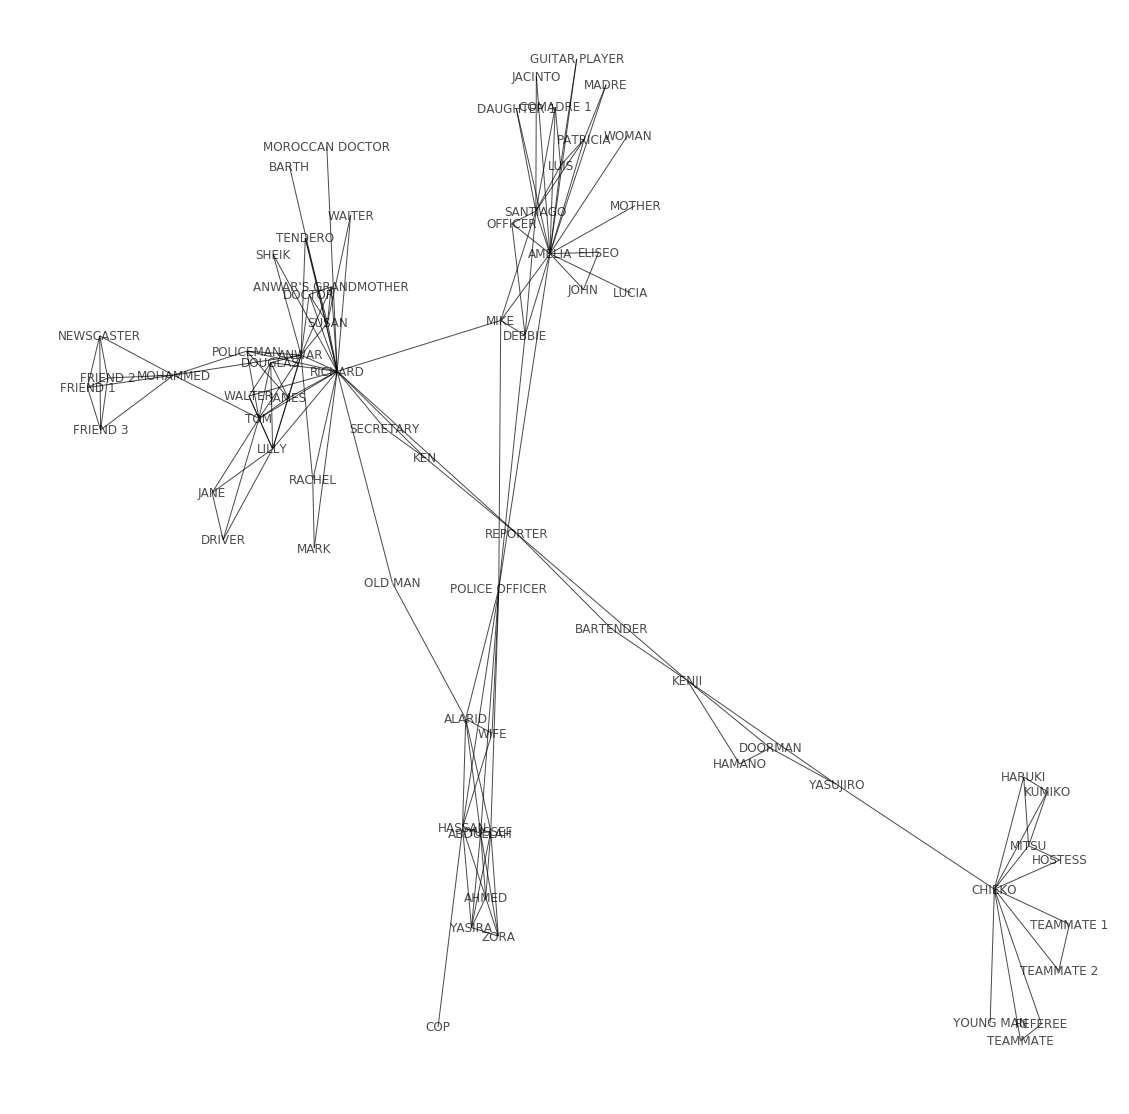

In [149]:
draw(G)

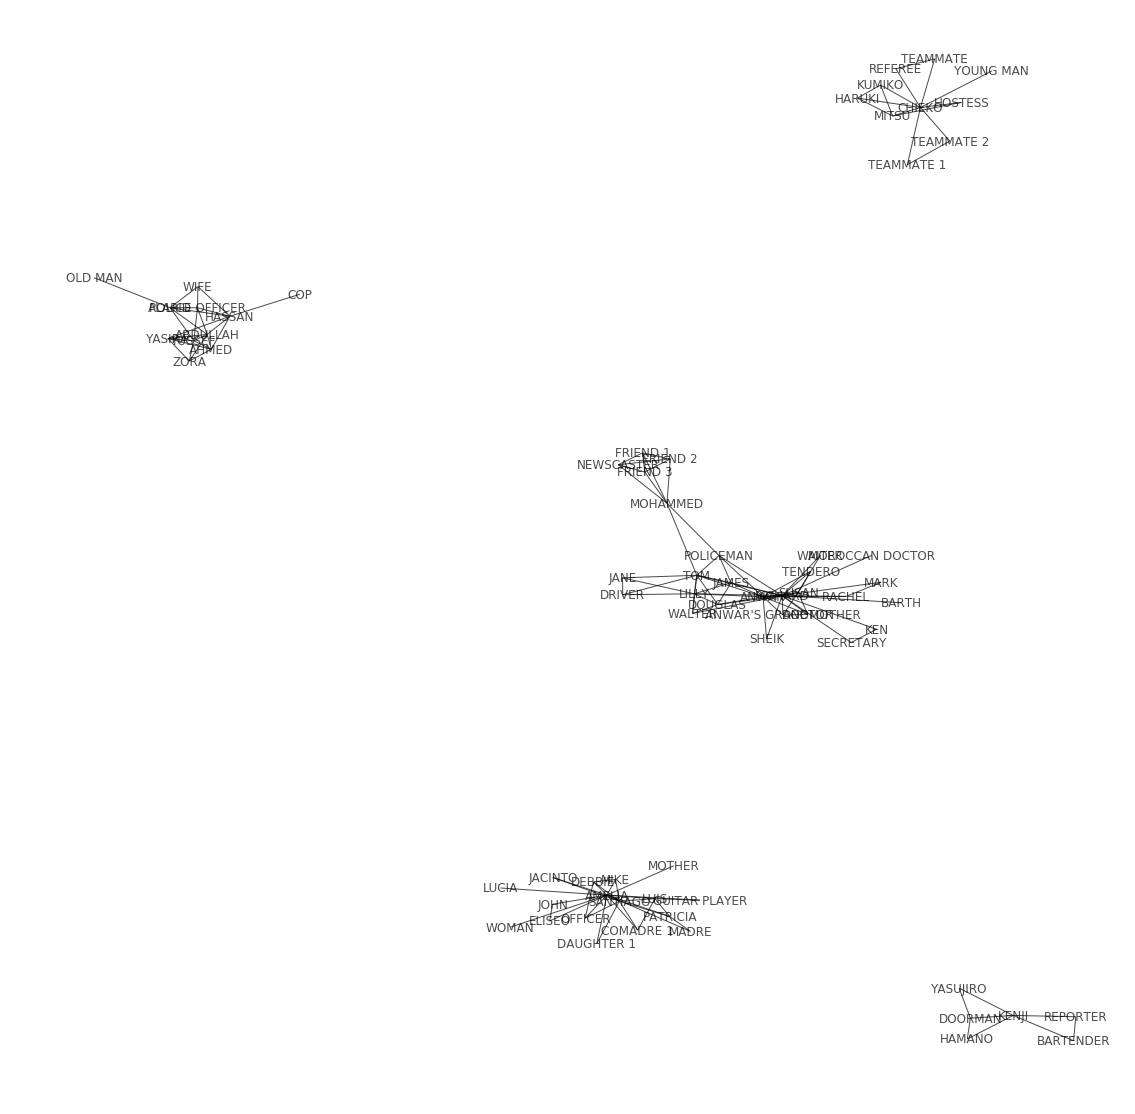

In [152]:
G =nx.read_gexf("babel.gexf", relabel= True)
for i in range(10):
    e = getEdgeWithMaxSP(G)
    G.remove_edge(*e)
draw(G)